In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
data = pd.read_csv(r'C:\Users\p\Desktop\open\open\train.csv')

1155.486917764095
554.5774700310897


C:\Users\p\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


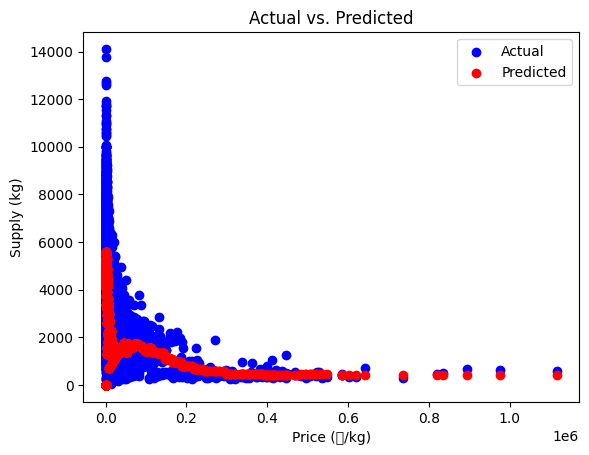

In [44]:
# X 값과 y 값 변수 정하기
X = data[['supply(kg)']]
y = data[['price(원/kg)']]

# 데이터셋을 학습용과 테스트용으로 나누기 # test_size 는 테스트 세트의 비율을 나타내는 부동 소수점 수 또는 정수 # 난수 생성기의 시드 (무슨의미인지 모르겠음)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# XGBoost 모델 생성 및 학습  # 일반적으로 회귀 분석할 때 reg:squarederror 방법을 사용한다 
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=20)
xg_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = xg_reg.predict(X_test)

# 예측 성능 평가 1 # rmse 은 평균제곱오찰
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

# 예측 성능 평가 2 # 절대 오차의 평균값
mae = mean_absolute_error(y_test, y_pred)
print(mae)

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Price (원/kg)')
plt.ylabel('Supply (kg)')
plt.legend()
plt.show()
